In [1]:
import teacher_model as tm
import quantum_computer as qc
import quantum_trainer as qt
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

Note: Main Data is initialized
25
25
Note: Data splitting completed. Training Data and Testing Data are split on a ratio: 0.5


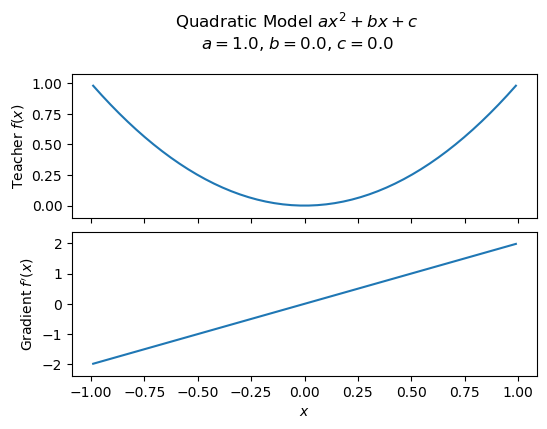

In [8]:
# Define my teacher model
my_teacher_model = tm.TeacherModel(verbose=False)
my_teacher_model.config(select_model="quad", x_lower_limit=-0.99, x_upper_limit=0.99, number_of_points=50, a=1.0, b=0, c=0, split=0.5)
my_teacher_model.plot_model()

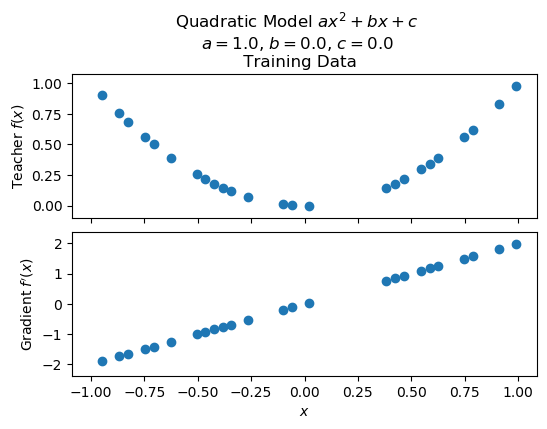

In [9]:
my_teacher_model.plot_model(type="train")

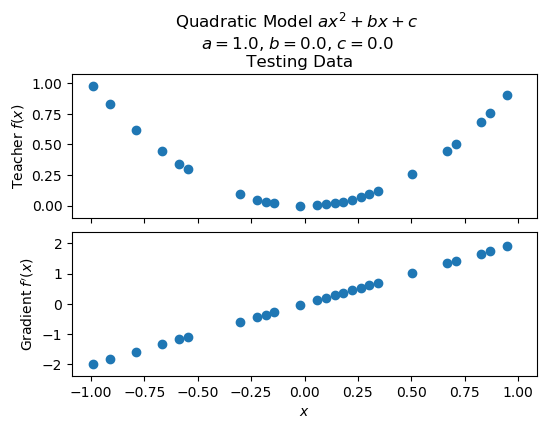

In [10]:
my_teacher_model.plot_model(type="test")

In [ ]:
# Define quatnum_computer

# Data Encoding
my_quantum_encoding = qc.QuantumEncoding(verbose=False)
my_quantum_encoding.config(select_encoding="rzacos_ryasin")

# Entangling block
my_entangling = qc.HamlitonianMixerBlock(verbose=False)

# Single qubit rotation block
my_parameterised = qc.SingleQubitRotationBlock(verbose=False)

# Quantum Measurement
my_measurement = qc.QuantumMeasurement(verbose=False)
my_measurement.config(select_measurement = "first_qubit_Z")

# Package all components into a quantum computer
my_quantum_computer = qc.QuantumComputer(verbose=False)
my_quantum_computer.config(number_of_qubits=2, depth=2) 
my_quantum_computer.inputs(Encode=my_quantum_encoding, A=my_entangling, B=my_parameterised, Observable=my_measurement)

In [ ]:
# Define quantum trainer
my_trainer = qt.QuantumTrainer(verbose=False)
my_trainer.config(select_optimiser = "GD", select_loss="sobolev_loss", max_training_steps=2000, learning_rate=0.001)
my_trainer.inputs(my_teacher_model, my_quantum_computer)

In [ ]:
my_trainer.train()

In [ ]:
my_trainer.quantum_result_store.plot_loss()

In [ ]:
my_trainer.quantum_result_store.plot_a()

In [ ]:
my_trainer.quantum_result_store.plot_final_result()

In [ ]:
my_trainer.quantum_result_store.plot_final_result_gradient()